# Importing Dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

# Load Dataset

In [5]:
df = pd.read_csv(r"C:\Users\rrosh\OneDrive\Desktop\ML dataset\Sleep_health_and_lifestyle_dataset.csv")

# Data Cleaning

In [6]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [7]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [8]:
df_cleaned = df.drop_duplicates()

In [9]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [10]:
# Convert 'Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder' to categorical variables
categorical_columns = ['Gender','Occupation','BMI Category','Blood Pressure','Sleep Disorder']
df_cleaned[categorical_columns] = df_cleaned[categorical_columns].astype('category')

# Exploratory Data Analysis

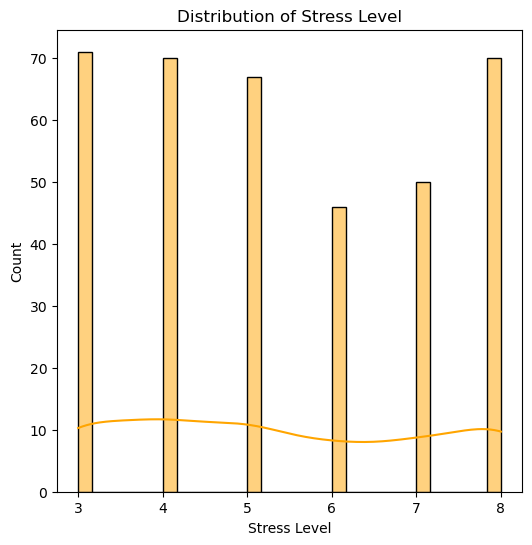

In [11]:
#Target variable Distribution
plt.figure(figsize=(6,6))
sns.histplot(df_cleaned['Stress Level'],bins=30,kde=True,color='orange')
plt.title('Distribution of Stress Level')
plt.show()

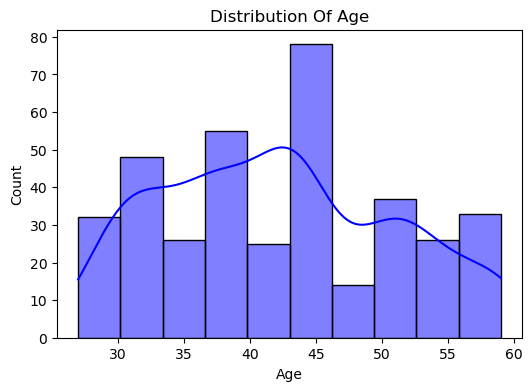

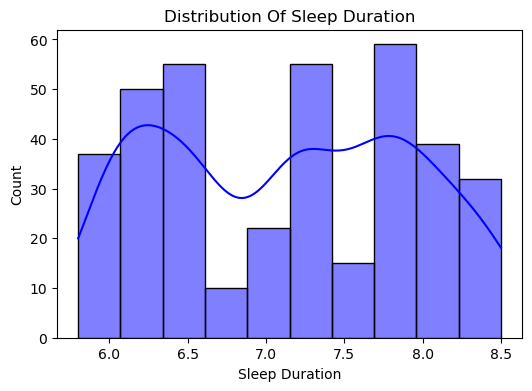

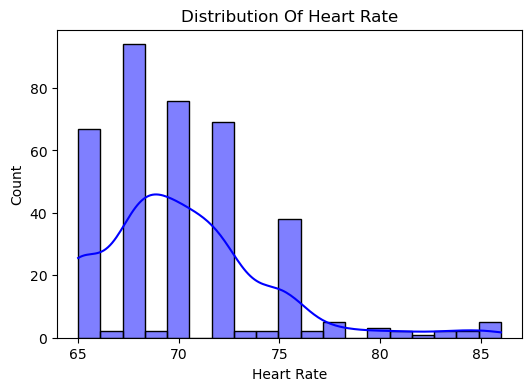

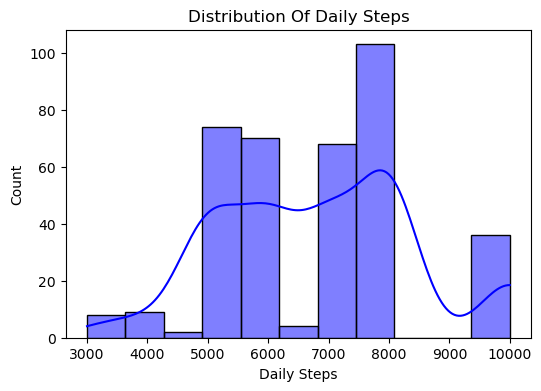

In [12]:
# Plot Distribution of Continuous Features
features = ['Age','Sleep Duration','Heart Rate','Daily Steps']
for feature in features:
    plt.figure(figsize=(6,4))
    sns.histplot(df_cleaned[feature],kde=True,color='blue')
    plt.title(f"Distribution Of {feature}")
    plt.show()

C:\Users\rrosh\AppData\Local\Temp\ipykernel_14208\1019823680.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df_cleaned, palette='viridis')


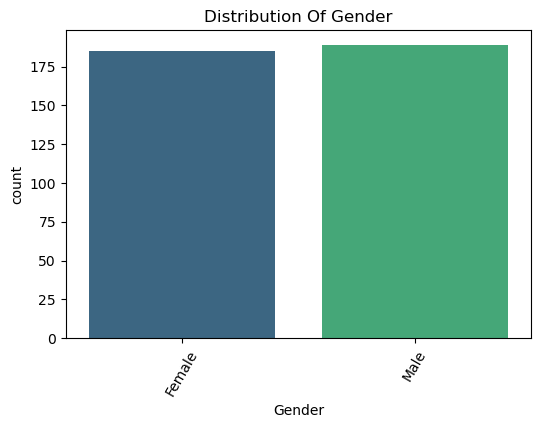

C:\Users\rrosh\AppData\Local\Temp\ipykernel_14208\1019823680.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df_cleaned, palette='viridis')


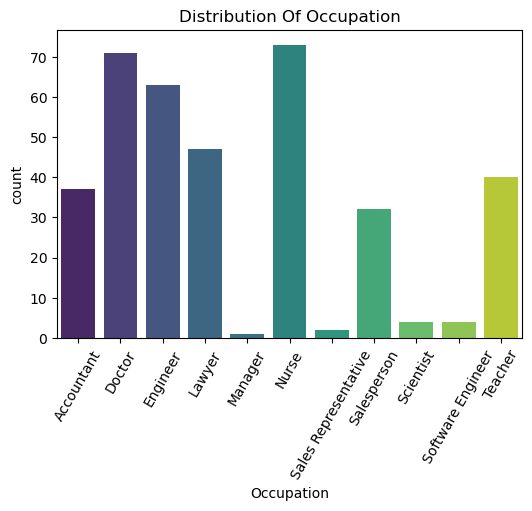

C:\Users\rrosh\AppData\Local\Temp\ipykernel_14208\1019823680.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df_cleaned, palette='viridis')


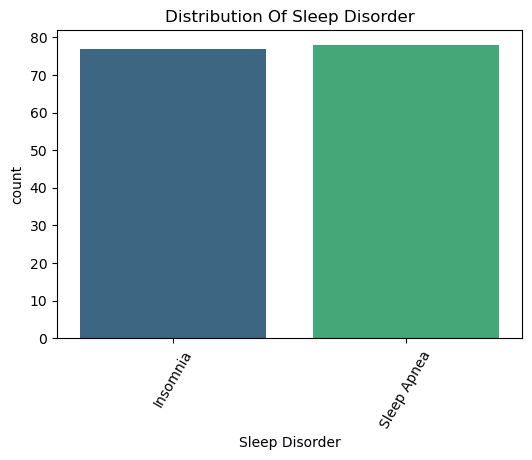

C:\Users\rrosh\AppData\Local\Temp\ipykernel_14208\1019823680.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df_cleaned, palette='viridis')


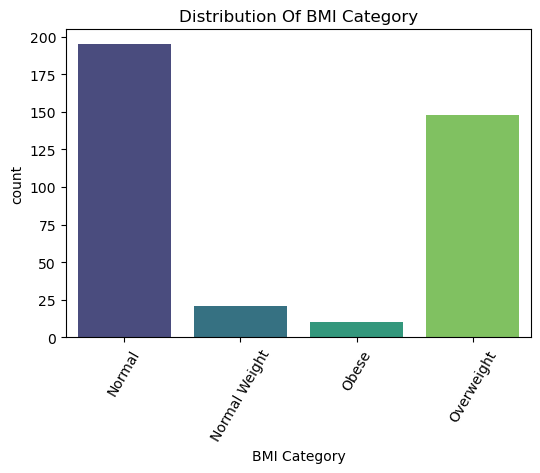

In [13]:
# Plotting the Categorical Features
categorical_features = ['Gender','Occupation','Sleep Disorder','BMI Category']
for feature in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=feature, data=df_cleaned, palette='viridis')
    plt.title(f"Distribution Of {feature}")
    plt.xticks(rotation=60)
    plt.show()

### Bivariate Analysis

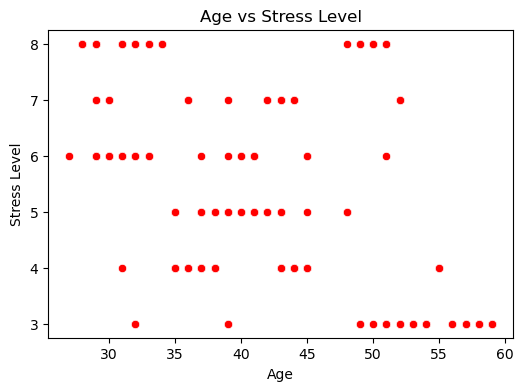

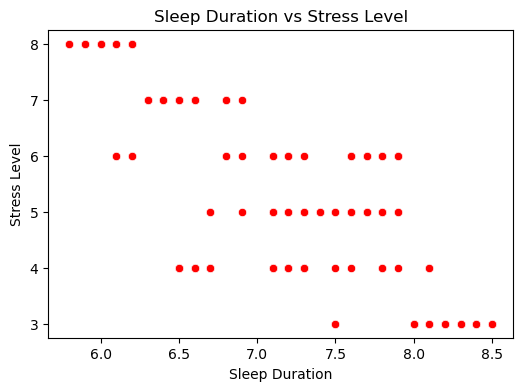

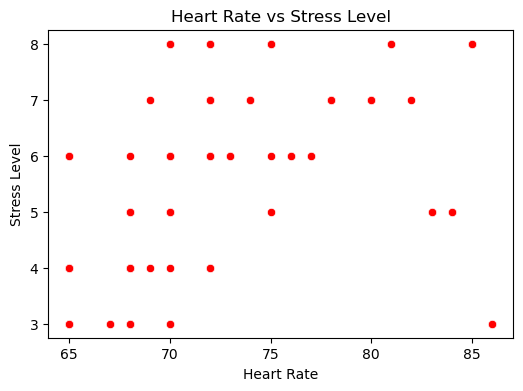

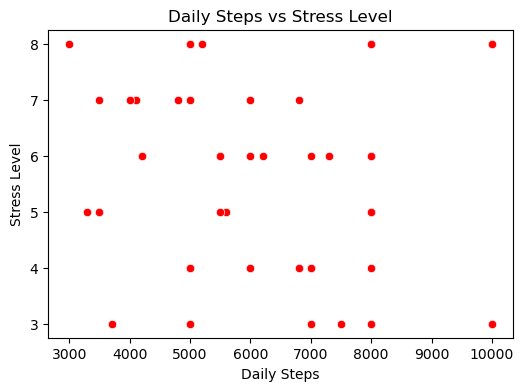

In [14]:
feature = ['Age','Sleep Duration','Heart Rate','Daily Steps']
for ftr in feature:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=ftr,y='Stress Level',data = df_cleaned,color='red')
    plt.title(f"{ftr} vs Stress Level")
    plt.show()

C:\Users\rrosh\AppData\Local\Temp\ipykernel_14208\3540305226.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature,y='Stress Level',data = df_cleaned,palette='coolwarm')


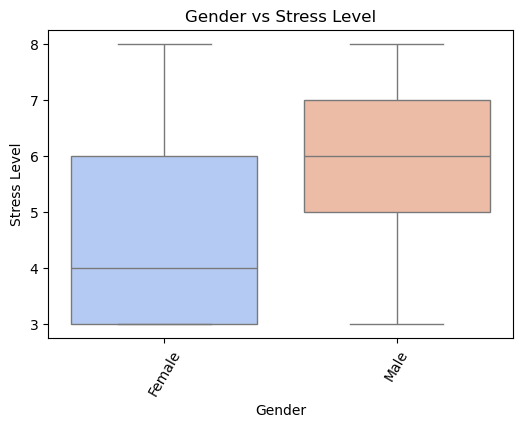

C:\Users\rrosh\AppData\Local\Temp\ipykernel_14208\3540305226.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature,y='Stress Level',data = df_cleaned,palette='coolwarm')


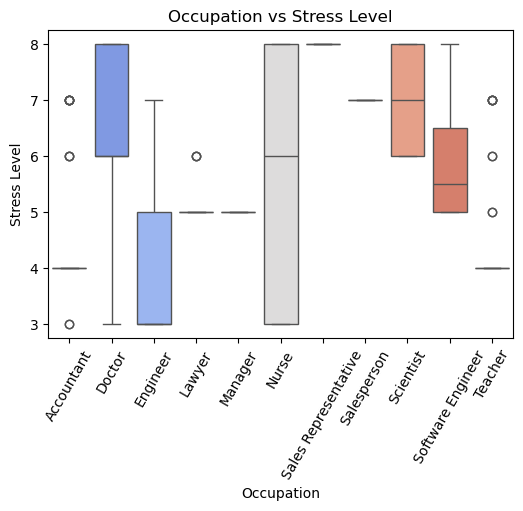

C:\Users\rrosh\AppData\Local\Temp\ipykernel_14208\3540305226.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature,y='Stress Level',data = df_cleaned,palette='coolwarm')


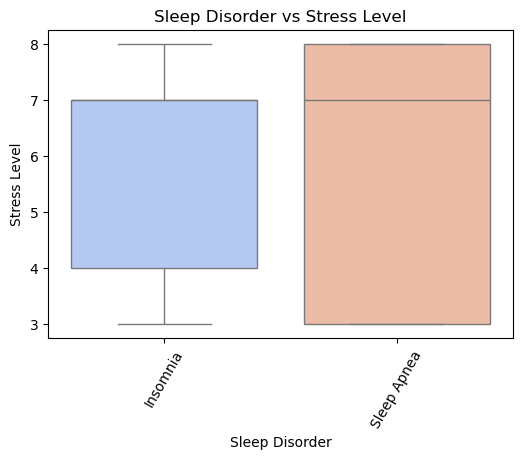

C:\Users\rrosh\AppData\Local\Temp\ipykernel_14208\3540305226.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature,y='Stress Level',data = df_cleaned,palette='coolwarm')


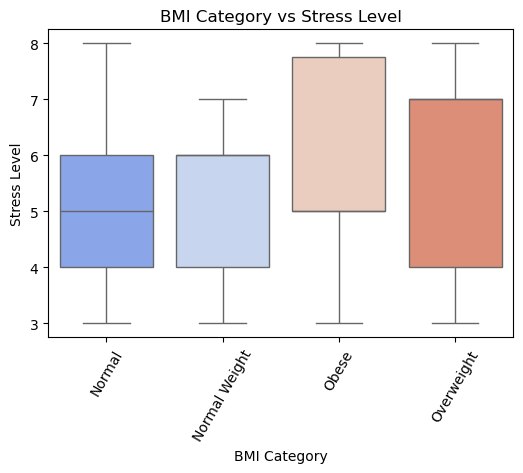

In [15]:
# Boxplot to check the Distribution of Stress Level across Categories
for feature in categorical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=feature,y='Stress Level',data = df_cleaned,palette='coolwarm')
    plt.title(f'{feature} vs Stress Level')
    plt.xticks(rotation=60)
    plt.show()

### Correlation Analysis

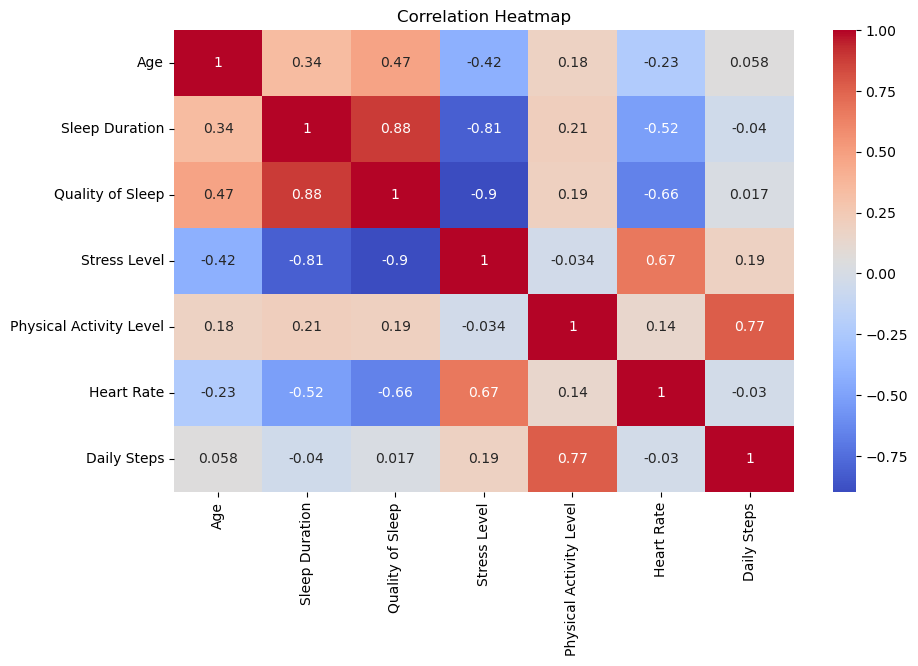

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
df_numericvalues = df[['Age','Sleep Duration','Quality of Sleep','Stress Level','Physical Activity Level','Heart Rate','Daily Steps']]
correlation_matrix = df_numericvalues.corr()
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Outlier Detection

C:\Users\rrosh\AppData\Local\Temp\ipykernel_14208\2277395080.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cleaned[feature], palette="Set1")


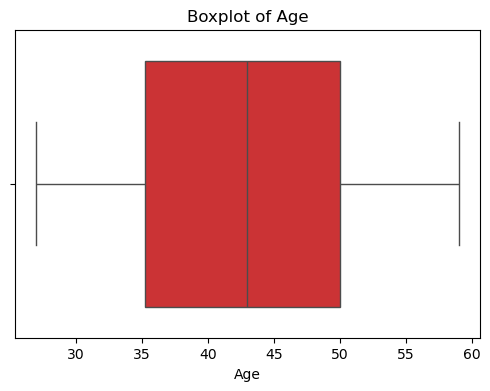

C:\Users\rrosh\AppData\Local\Temp\ipykernel_14208\2277395080.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cleaned[feature], palette="Set1")


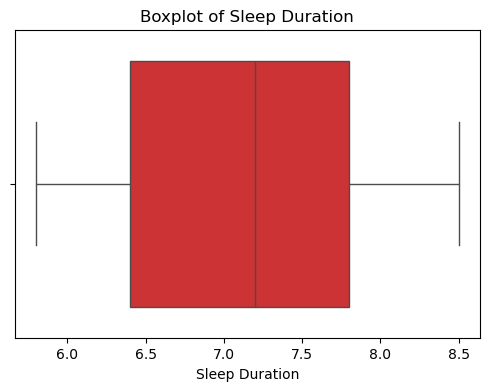

C:\Users\rrosh\AppData\Local\Temp\ipykernel_14208\2277395080.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cleaned[feature], palette="Set1")


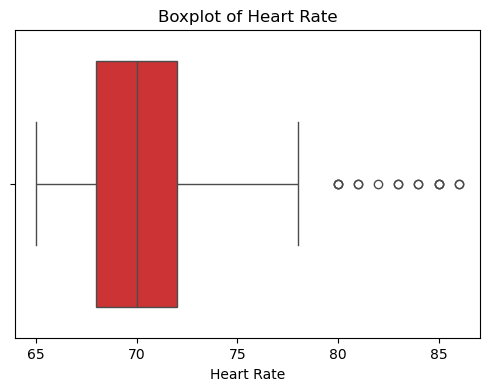

C:\Users\rrosh\AppData\Local\Temp\ipykernel_14208\2277395080.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cleaned[feature], palette="Set1")


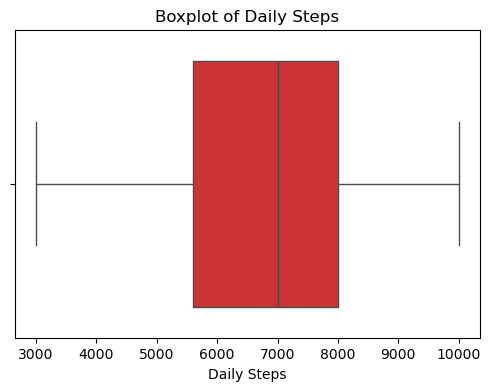

In [17]:
# Boxplot to detect outliers in continuous features
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_cleaned[feature], palette="Set1")
    plt.title(f'Boxplot of {feature}')
    plt.show()


### Data Preprocessing

In [18]:
df_encoded = pd.get_dummies(df_cleaned, drop_first=True) 
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Person ID                        374 non-null    int64  
 1   Age                              374 non-null    int64  
 2   Sleep Duration                   374 non-null    float64
 3   Quality of Sleep                 374 non-null    int64  
 4   Physical Activity Level          374 non-null    int64  
 5   Stress Level                     374 non-null    int64  
 6   Heart Rate                       374 non-null    int64  
 7   Daily Steps                      374 non-null    int64  
 8   Gender_Male                      374 non-null    bool   
 9   Occupation_Doctor                374 non-null    bool   
 10  Occupation_Engineer              374 non-null    bool   
 11  Occupation_Lawyer                374 non-null    bool   
 12  Occupation_Manager    

# Model Training

In [19]:
X = df_encoded.drop(columns=['Stress Level'])
y = df_encoded['Stress Level']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# Model Evaluation

In [21]:
# Prediction on the Testing data
y_pred = rf_model.predict(X_test)

# Calculate the metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Root Mean Squared Error (RMSE): 0.1444068327099979
Mean Squared Error (MSE): 0.02085333333333332
Mean Absolute Error (MAE): 0.04319999999999999
R-squared (R2): 0.9933253670194606


In [23]:
import joblib

# Save the trained model
joblib.dump(rf_model, "sleep_stress_model.pkl")

print("✅ Model saved as sleep_stress_model.pkl")


✅ Model saved as sleep_stress_model.pkl


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import joblib

num_features = ["Age", "Sleep Duration", "Quality of Sleep", 
                "Physical Activity Level", "Heart Rate", "Daily Steps"]

pipeline = Pipeline([
    ("model", RandomForestRegressor(random_state=42))
])

# Fit pipeline
pipeline.fit(X, y)

# Save pipeline
joblib.dump(pipeline, "sleep_stress_pipeline.pkl")

print("✅ Pipeline saved as sleep_stress_pipeline.pkl")


✅ Pipeline saved as sleep_stress_pipeline.pkl
